In [36]:
#Import libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [37]:
#Get the data
df = pd.read_csv("ALO.csv")
df

,Date,Actual,Linear,Non-linear,ARIMA,LSTM,Prophet
0,12/1/2022,80.0,87.184451,72.628735,79.790036,76.649295,60.716280
1,12/2/2022,85.0,87.223227,72.599684,80.996575,76.596585,60.592381
2,12/5/2022,85.0,87.339556,72.519290,80.929539,76.543237,59.160714
3,12/6/2022,80.0,87.378332,72.494831,80.974829,76.693074,58.530141
4,12/7/2022,78.5,87.417109,72.471584,80.977863,76.782856,57.830587
5,12/8/2022,77.0,87.455885,72.449576,80.939658,76.870288,57.161472
6,12/9/2022,77.3,87.494661,72.428835,80.922168,76.795180,56.441188
7,12/12/2022,77.4,87.610990,72.374481,80.961001,76.682968,54.546881
8,12/13/2022,78.2,87.649767,72.359079,80.933760,76.818459,54.102630
9,12/14/2022,78.8,87.688543,72.345082,80.934538,76.897744,53.639695


In [38]:
df['Time'] = np.arange(len(df.index))
df

,Date,Actual,Linear,Non-linear,ARIMA,LSTM,Prophet,Time
0,12/1/2022,80.0,87.184451,72.628735,79.790036,76.649295,60.716280,0
1,12/2/2022,85.0,87.223227,72.599684,80.996575,76.596585,60.592381,1
2,12/5/2022,85.0,87.339556,72.519290,80.929539,76.543237,59.160714,2
3,12/6/2022,80.0,87.378332,72.494831,80.974829,76.693074,58.530141,3
4,12/7/2022,78.5,87.417109,72.471584,80.977863,76.782856,57.830587,4
5,12/8/2022,77.0,87.455885,72.449576,80.939658,76.870288,57.161472,5
6,12/9/2022,77.3,87.494661,72.428835,80.922168,76.795180,56.441188,6
7,12/12/2022,77.4,87.610990,72.374481,80.961001,76.682968,54.546881,7
8,12/13/2022,78.2,87.649767,72.359079,80.933760,76.818459,54.102630,8
9,12/14/2022,78.8,87.688543,72.345082,80.934538,76.897744,53.639695,9


In [39]:
df['new_time'] = pd.to_datetime(df.Date)
type(df['new_time'])

pandas.core.series.Series

In [40]:
df.index = df['new_time']
df

,Date,Actual,Linear,Non-linear,ARIMA,LSTM,Prophet,Time,new_time
new_time,,,,,,,,,
2022-12-01,12/1/2022,80.0,87.184451,72.628735,79.790036,76.649295,60.716280,0,2022-12-01
2022-12-02,12/2/2022,85.0,87.223227,72.599684,80.996575,76.596585,60.592381,1,2022-12-02
2022-12-05,12/5/2022,85.0,87.339556,72.519290,80.929539,76.543237,59.160714,2,2022-12-05
2022-12-06,12/6/2022,80.0,87.378332,72.494831,80.974829,76.693074,58.530141,3,2022-12-06
2022-12-07,12/7/2022,78.5,87.417109,72.471584,80.977863,76.782856,57.830587,4,2022-12-07
2022-12-08,12/8/2022,77.0,87.455885,72.449576,80.939658,76.870288,57.161472,5,2022-12-08
2022-12-09,12/9/2022,77.3,87.494661,72.428835,80.922168,76.795180,56.441188,6,2022-12-09
2022-12-12,12/12/2022,77.4,87.610990,72.374481,80.961001,76.682968,54.546881,7,2022-12-12
2022-12-13,12/13/2022,78.2,87.649767,72.359079,80.933760,76.818459,54.102630,8,2022-12-13


In [41]:
x = df['Actual'].values
y = df['Prophet'].values
z = df['LSTM'].values
k =df['ARIMA'].values
h = df['Linear'].values
l = df['Non-linear'].values

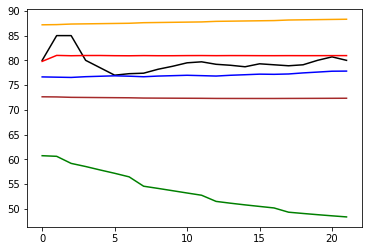

In [42]:
plt.plot(figsize = (16,10))
plt.plot(x, 'black', label = "Original price")
plt.plot(y, 'green', label = "Original price")
plt.plot(z, 'blue', label = "Original price")
plt.plot(k, 'red', label = "Original price")
plt.plot(h, 'orange', label = "Original price")
plt.plot(l, 'brown', label = "Original price")
plt.show()